<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 6 - Class 2 - 10/20</h1>
</div>

## Objectives for this week:
* Objects, 
* Class declarations, Attributes, Methods
* Self keywords
* Object Inheritance, Generating Object Instances
* Dot Notation

## Todays Agenda
* Homework Presentations
* Dot Notation
* More on Generating Object, Instances
* More on Class attributes and methods
* Dunder methods/attributes
* Operator Overloading
* Intro to inheritance


# Homework Presentations

# Exercise 2

Create the decorator function(s) that wraps the `hello` function in the following html tags.

hello() -> `<div><p><b>hello</b></p></div>`



# Dot Notation

Dot notation refers to the use of `.` to reference attributes or methods of an object

example:
```python
    s = Example()
    s.arg1
    s.method1()
```

The `.` allows us to access attributes of the object.

We've been using this since week 1. 

examples:

```python
import string
    
string.ascii_lowercase
```

or

```python
s = list()

s.append(3)
```


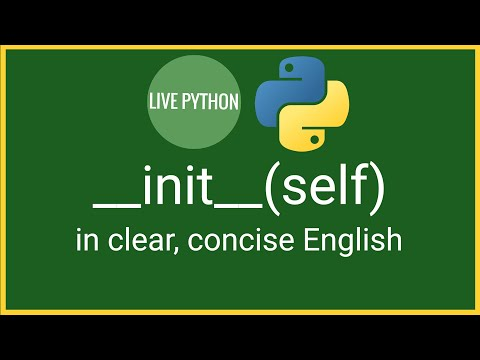

In [1]:
from IPython.lib.display import YouTubeVideo

YouTubeVideo('AsafkCAJpJ0', width=600)

# Reading for objects

https://docs.python.org/3/tutorial/classes.html  

https://www.digitalocean.com/community/tutorials/how-to-construct-classes-and-define-objects-in-python-3  

https://www.hackerearth.com/practice/python/object-oriented-programming/classes-and-objects-i/tutorial/  

https://www.bitdegree.org/learn/python-class  

https://dev.to/codemouse92/dead-simple-python-classes-42f7  

https://techsparx.com/software-development/python/classes.html  

https://opensource.com/article/19/7/get-modular-python-classes  

https://medium.com/better-programming/python-how-object-and-class-attributes-work-8edf4ed9caa4  

https://dzone.com/articles/python-class-attributes-vs-instance-attributes  

# Generating Objects, Instances

In [2]:
class Example1:
    def __init__(self, arg1, arg2, kwarg1=True):
        self.arg1 = arg1
        self.arg2 = arg2
        self.kwarg1 = kwarg1
        
    def method1(self):
        return "method1"

In [3]:
s = Example1("arg1", "arg2", kwarg1=False)
print(s.arg1)
print(s.arg2)
print(s.kwarg1)
print(s.method1())

arg1
arg2
False
method1


# Using objects

In [20]:
class Ballot:
    presidential_choices = {
        'A': 'Donald Trump',
        'B': 'Joe Biden'
    }
    def __init__(self, president=None, governor=None,
                 senator=None, congressperson=None):
        self.president = president
        self.governor = governor
        self.senator = senator
        self.congressperson = congressperson
    def pick_president(self):
        display_choices(presidential_choices)
    def display_choices(self, choices):
        for k,v in choices.items():
            print(f"{k}: {v}")
        choice = input("Choose A or B")
    @staticmethod
    def print_year():
        print(2020)
        
my_ballot = Ballot()
my_ballot.pick_president("my dog")
my_ballot.display_choices(my_ballot.presidential_choices)

TypeError: pick_president() takes 1 positional argument but 2 were given

# `getattr()`

`getattr(object, name[, default])` -> `value`

Get a named attribute from an object 

`getattr(x, 'y')` is equivalent to `x.y` 

When a default argument is given, it is returned when the attribute doesn't exist; without it, an exception is raised in that case.

In [21]:
class Book:
    title = "war and peace"

book = Book()

print(getattr(book, "title"))
print(book.title)
getattr(book, 'title') == book.title

war and peace
war and peace


True

In [1]:
list_of_attrs = ["title", "author"]


# `setattr()`

Sets the named attribute on the given object to the specified value.

The `setattr()` function takes three parameters:
* object - object whose attribute is to be set
* name - attribute name
* value - value given to the attribute


`setattr(x, 'y', v)` is equivalent to `x.y = v`

In [22]:
class Book:
    title = None

book_1 = Book()

setattr(book_1,"title", "war and peace")

print(book_1.title)
print(getattr(book_1, 'title'))

war and peace
war and peace


# "Dunder" Methods/Attributes

## `__dict__`

This attribute contains a dictionary of the class/object attributes

In [24]:
class DictExample:
    attribute1 = "attribute1 value"
    
    def __init__(self, attr):
        self.attribute1 = attr
        
    def classmethod1(self):
        return "classmethod1 value"
    
print(DictExample.__dict__)

d = DictExample('attr')
d.new_attribute = False
d.__dict__

{'__module__': '__main__', 'attribute1': 'attribute1 value', '__init__': <function DictExample.__init__ at 0x000001DB13CB9F70>, 'classmethod1': <function DictExample.classmethod1 at 0x000001DB13CB9DC0>, '__dict__': <attribute '__dict__' of 'DictExample' objects>, '__weakref__': <attribute '__weakref__' of 'DictExample' objects>, '__doc__': None}


{'attribute1': 'attr', 'new_attribute': False}

## `__getattr__` 

This method will control how python accesses attributes of your object/class

In [25]:
class Book:
    def __init__(self, title=None, author=None):
        self.title = title
        self.author = author
        
book = Book('war and peace', author = 'Leo Tolstoy')

print(book.title)
print(book.author)
print(book.year)

war and peace
Leo Tolstoy


AttributeError: 'Book' object has no attribute 'year'

In [26]:
class Book:
    def __init__(self, title=None, author=None):
        self.title = title
        self.author = author
    
    def __getattr__(self, attr):
        if attr not in self.__dict__:
            #self.__dict__[attr] = None 
            #self.attr = None
            setattr(self, attr, None)   
        else:
            return getattr(self, attr)
        
book = Book('war and peace', author = 'Leo Tolstoy')

print(book.title)
print(book.author)
print(book.year)

war and peace
Leo Tolstoy
None


## `__setattr__`  

This method will control how your object sets attributes.

In [27]:
class Book:
    def __init__(self, title=None, author=None):
        self.title = title
        self.author = author
        
book = Book('war and peace', author = 'Leo Tolstoy')

print(book.title)
print(book.author)

war and peace
Leo Tolstoy


In [28]:
class Book:
    def __init__(self, title=None, author=None):
        self.title = title
        self.author = author
    
    def __setattr__(self, attr, value):
        if type(value) == str:
            #self.attr = value.title()
            #setattr(self, attr, value)
            self.__dict__[attr] = value.title()
        else:
            self.__dict__[attr] = None
        
book = Book('war and peace', author = 3)

print(book.title)
print(book.author)

War And Peace
None


## `__getitem__`  

This method will control how you can access attributes using subscription.  

`cls['key']`

In [33]:
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
book = Book('war and peace', author='leo tolstoy')

book['title']

TypeError: 'Book' object is not subscriptable

In [37]:
# make it subscriptable by using __getitem__

class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
    def __getitem__(self, attr):
        return getattr(self,attr)
    
book = Book('war and peace', author='leo tolstoy')
book.year = 2020
book['year']
#book['title']

2020

## `__setitem__`  

This method will control how you can set attributes using item assignment.  

e.g. `cls['key'] = 'value'`

In [ ]:
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
book = Book('war and peace', author='leo tolstoy')

book['title'] = 'new book'

In [38]:
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
        
    def __getitem__(self, key):
        return getattr(self,key)
    
    def __setitem__(self, key, value):
        return setattr(self,key, value)
    
    
book = Book('war and peace', author='leo tolstoy')

book['title'] = 'new book' #overriding both methods
book['title']

'new book'

## `__repr__`  

This method controls how your class is presented (like when outputted)

In [39]:
#not overriding the dunder method
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
book = Book('war and peace', author='leo tolstoy')

book

In [40]:
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
        
    def __repr__(self):   #overriding the dunder method
        return f"Book Class - title: {self.title}, author: {self.author}"
    
    
    
book = Book('war and peace', author='leo tolstoy')

book

Book Class - title: war and peace, author: leo tolstoy

## `__str__`  

This method controls how your method is turned into a str (like if printed).

In [41]:
#not overriding
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
book = Book('war and peace', author='leo tolstoy')

print(book)

In [42]:
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
    def __str__(self):  #overriding the init dunder
        return f"book: '{self.title}' by author {self.author}"
    
    
book = Book('war and peace', author='leo tolstoy')

print(book)

book: 'war and peace' by author leo tolstoy


In [43]:
class Book:
    def __init__(self, title=None,author=None):
        self.title = title
        self.author = author
    
    def __str__(self):  #for printing
        return f"book: '{self.title}' by author {self.author}"
    
    def __repr__(self):  #for just outputting
        return f"Book Class - title: {self.title}, author: {self.author}"

book = Book('war and peace', author='leo tolstoy')

print(book)
book 

book: 'war and peace' by author leo tolstoy


Book Class - title: war and peace, author: leo tolstoy

## Putting it all together

In [46]:
import datetime

class Book:
    def __init__(self, title=None,author=None, 
     time_entered = datetime.datetime.now()):
        self.title = title
        self.author = author
        self.time_entered = time_entered
    
    def __repr__(self):
        return f"{self.title} - {self.author}"
    
    def __str__(self):
        return f"Book-{self}"
    
    def __setattr__(self, attr, value):
        if type(value) == str:
            #self.attr = value.capitalize()
            #setattr(self, attr, value)
            self.__dict__[attr] = value.title()
        else:
            self.__dict__[attr] = None
    
    def __getattr__(self, attr):
        if attr not in self.__dict__:
            #self.__dict__[attr] = None 
            #self.attr = None
            setattr(self, attr, None)   
        else:
            return getattr(self, attr)
    
    def __getitem__(self, key):
        return getattr(self,key)
    
    def __setitem__(self,key, value):
        return setattr(self,key,value)
    
catalog = {
    'war and peace': 'leo tolstoy', 
    '1984': 'george orwell', 
    'brave new world': 'aldous huxley', 
    'catch-22': 'joseph heller'
}

books = [Book(title, author) for title, author in catalog.items()]

#books[0]['author'] #access the outhor like a dict

books[0]['title'] 

'War And Peace'

In [47]:
class Example():
    def method(self):
        return "Hello"
    def method(self):
        return "Goodbye"
    
e = Example()

e.method()

'Goodbye'

# Operator Overloading

Certain operators like `==`, `+`, `-`, `*` can be overloaded to be used with user-defined datatypes like classes as well as built-in type like integers

`==`  `__eq__`  
`-` `__sub__`  
`*` `__mul__`  
`/` `__truediv__`  
`//` `__floordiv__`  
`%` `__mod__`  
`**` `__pow__`  
`<`  `__lt__`   
`>`  `__gt__`  
`<=` `__le__`  
`>=` `__ge__`  
`!=` `__ne__`

# Point example

In [50]:
class Floor:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    #def __eq__(self, other):
     #   return self.x == other.x and self.y == other.y
    
p = Point(2,4)
q = Point(2,4)

p == q

True

#### How do we implement others? (code along)

In [48]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
p = Point(2,4)
q = Point(2,4)

p == q

True

In [49]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
p = Point(2,4)
q = Point(2,4)

p == q

True

# Introduction to inheritance

Object inheritance is when you want to create an object that's based off of the structure of another class or you want to create an object that others are based off of.

The format for inherited classes are such:
```python
    class BaseClass:
        pass
    
    class AlternateBaseClass
        pass
    
    class DerivedClass(BaseClass, AlternateBaseclass)
        pass
```

In [ ]:
class Animal:
    def __init__(self, name, type_of_animal=None, sound=None):
        self.name = name
        self.type = type_of_animal
        self.sound = sound
        
    def make_sound(self):
        print(f"a {self.type} {self.sound}")
    
cat = Animal('matilda', 'cat', 'meows')
dog = Animal('clifford', 'dog', 'barks')
cow = Animal('spot', 'cow', 'moos')
cat.make_sound()
dog.make_sound()
cow.make_sound()
        

In [ ]:
class Cat(Animal):
    def __init__(self, name):
        Animal.__init__(self, name, type_of_animal='cat', sound='meows')
        
matilda = Cat('matilda')

matilda.make_sound()